# ML 08-Walmart Prediction

# *About this file :*
* This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales.
    * Features:
        * Store - the store number
        * Date - the week of sales
        * Weekly_Sales - sales for the given store
        * Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
        * Temperature - Temperature on the day of sale
        * Fuel_Price - Cost of fuel in the region
        * CPI – Prevailing consumer price index
        * Unemployment - Prevailing unemployment rate
        * Holiday Events<br /> Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br /> Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br /> Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br /> Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

| Feature Name  | Description in English                                                                 | Description in Arabic                                                                 |
|---------------|---------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| 🚩Store         | The store number                                                                      | رقم المتجر                                                                             |
| 🚩Date          | The week of sales                                                                     | أسبوع المبيعات                                                                         |
| 🚩Weekly_Sales  | Sales for the given store                                                             | المبيعات الأسبوعية للمتجر المحدد                                                       |
| 🚩Holiday_Flag  | Whether the week is a special holiday week (1 – Holiday week, 0 – Non-holiday week)   | ما إذا كانت الأسبوع يصادف عطلة خاصة (1 - أسبوع العطلة، 0 - أسبوع غير العطلة)           |
| 🚩Temperature   | Temperature on the day of sale                                                        | درجة الحرارة في يوم البيع                                                              |
| 🚩Fuel_Price    | Cost of fuel in the region                                                            | تكلفة الوقود في المنطقة                                                                |
| 🚩CPI           | Prevailing consumer price index                                                       | مؤشر أسعار المستهلك السائد                                                             |
| 🚩Unemployment  | Prevailing unemployment rate                                                          | معدل البطالة السائد                                                                    |
| 🚩Holiday Events| Special holidays like Super Bowl, Labour Day, Thanksgiving, Christmas with their dates| الأعياد الخاصة مثل السوبر بول، عيد العمال، عيد الشكر، عيد الميلاد مع تواريخها          |

### 1) Import Libraries and Data Exploration

In [18]:
# Maxmize jupyter width
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio # for new templates
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [19]:
df = pd.read_csv("walmart.csv")
df.columns = df.columns.str.lower()
df.sample(10)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
3324,24,08-10-2010,1361944.94,0,54.82,2.90,132.75,8.28
5791,41,17-06-2011,1289151.84,0,62.30,3.70,192.90,6.93
306,3,25-06-2010,357346.48,0,83.79,2.65,214.67,7.34
1152,9,02-04-2010,545206.32,0,65.21,2.72,214.35,6.38
3574,25,26-10-2012,688940.94,0,56.69,3.88,216.15,7.29
2702,19,20-07-2012,1317672.92,0,76.17,3.73,138.23,8.19
211,2,27-05-2011,1797732.56,0,76.42,3.79,215.15,7.93
2587,19,07-05-2010,1566219.77,0,62.54,3.10,132.11,8.19
3286,23,12-10-2012,1412925.25,0,48.10,4.03,138.91,4.14
1859,14,05-02-2010,2623469.95,0,27.31,2.78,181.87,8.99


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [21]:
# Check Duplicate
df.duplicated().sum()

0

In [22]:
df.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [23]:
df.select_dtypes(include = 'number').quantile([0 , 0.1 , 0.2 , 0.25 , 0.3 , 0.4 , 0.5 , 0.6 , 0.75 , 0.8 , 0.9 , 1])

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0.00,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
0.10,5.00,384125.46,0.00,34.56,2.72,128.51,6.06
0.20,9.80,508575.93,0.00,43.96,2.84,130.78,6.62
0.25,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
0.30,14.00,616803.11,0.00,50.58,3.02,132.87,7.14
0.40,18.60,806271.57,0.00,56.74,3.23,137.14,7.54
0.50,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
0.60,27.40,1142989.34,0.00,67.88,3.57,196.95,8.19
0.75,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
0.80,36.20,1539977.11,0.00,77.78,3.79,214.69,8.88


### 2) Feature Engineering


In [24]:
# lower columns
df.columns =df.columns.str.lower()

# Handing Dates
df.date = pd.to_datetime(df.date, format = '%d-%m-%Y')
df['year'] = df.date.dt.year

df['quarter'] = pd.to_datetime(df['date']).dt.quarter
Quarter = {1:'Q1',2:'Q2',3:'Q3',4:'Q4'}
df['quarter'] = df['quarter'].map(Quarter)

df['month'] = df.date.dt.month
df['day'] = df.date.dt.day_name()
df['year_month'] = df['date'].dt.strftime('%Y-%m')

# Define Seasonality
def Season (x):
    if x in [3,4,5]:
        return 'Spring'
    elif x in [6,7,8]:
        return 'Summer'
    elif x in [9,10,11]:
        return 'Fall'
    else:
        return 'Winter'

df['season'] = df.month.apply(Season)

def F_to_C (x):
    x = (x - 32) * 5/9
    return x

# Convert F to C :
df.temperature = df.temperature.apply(F_to_C)

# Temp
# Temp
def Categorize_Temp (x):
    if x < 0:
        return "0 Very Cold"
    elif 0 <= x < 10:
        return "1 Cold"
    elif 10 <= x < 20:
        return "2 Moderate"
    elif 20 <= x < 30:
        return "3 Warm"
    elif x >= 30:
        return "4 Hot"
    else:
        return "Invalid Temperature"
df['temperature_class'] = df.temperature.apply(Categorize_Temp)

In [25]:
df.temperature_class.value_counts()

temperature_class
3 Warm         2107
2 Moderate     2017
1 Cold         1340
0 Very Cold     515
4 Hot           456
Name: count, dtype: int64

In [26]:
pd.cut(df.temperature , bins=10).value_counts()

temperature
(20.822, 26.5]        1268
(15.144, 20.822]      1239
(9.467, 15.144]       1071
(26.5, 32.178]         898
(3.789, 9.467]         862
(-1.889, 3.789]        556
(-7.567, -1.889]       296
(32.178, 37.856]       182
(-13.244, -7.567]       59
(-18.979, -13.244]       4
Name: count, dtype: int64

In [27]:
df.head(5)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,month,day,year_month,season,temperature_class
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,2010,Q1,2,Friday,2010-02,Winter,1 Cold
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,2010,Q1,2,Friday,2010-02,Winter,1 Cold
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,2010,Q1,2,Friday,2010-02,Winter,1 Cold
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,2010,Q1,2,Friday,2010-02,Winter,1 Cold
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,2010,Q1,3,Friday,2010-03,Spring,1 Cold


In [28]:
df = df[['store','date','year','quarter','year_month','month','day','season','holiday_flag','temperature_class','temperature','fuel_price','cpi','unemployment','weekly_sales']].sort_values(by=['store','date'],ascending =True).reset_index().drop('index',axis=1)

In [29]:
df.head(10)

,store,date,year,quarter,year_month,month,day,season,holiday_flag,temperature_class,temperature,fuel_price,cpi,unemployment,weekly_sales
0,1,2010-02-05,2010,Q1,2010-02,2,Friday,Winter,0,1 Cold,5.73,2.57,211.10,8.11,1643690.90
1,1,2010-02-12,2010,Q1,2010-02,2,Friday,Winter,1,1 Cold,3.62,2.55,211.24,8.11,1641957.44
2,1,2010-02-19,2010,Q1,2010-02,2,Friday,Winter,0,1 Cold,4.41,2.51,211.29,8.11,1611968.17
3,1,2010-02-26,2010,Q1,2010-02,2,Friday,Winter,0,1 Cold,8.13,2.56,211.32,8.11,1409727.59
4,1,2010-03-05,2010,Q1,2010-03,3,Friday,Spring,0,1 Cold,8.06,2.62,211.35,8.11,1554806.68
5,1,2010-03-12,2010,Q1,2010-03,3,Friday,Spring,0,2 Moderate,14.33,2.67,211.38,8.11,1439541.59
6,1,2010-03-19,2010,Q1,2010-03,3,Friday,Spring,0,2 Moderate,12.54,2.72,211.22,8.11,1472515.79
7,1,2010-03-26,2010,Q1,2010-03,3,Friday,Spring,0,2 Moderate,10.81,2.73,211.02,8.11,1404429.92
8,1,2010-04-02,2010,Q2,2010-04,4,Friday,Spring,0,2 Moderate,16.82,2.72,210.82,7.81,1594968.28
9,1,2010-04-09,2010,Q2,2010-04,4,Friday,Spring,0,2 Moderate,18.81,2.77,210.62,7.81,1545418.53


In [30]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
store,6435.00,23.00,1.00,12.00,23.00,34.00,45.00,12.99
date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
year,6435.00,2010.97,2010.00,2010.00,2011.00,2012.00,2012.00,0.80
month,6435.00,6.45,1.00,4.00,6.00,9.00,12.00,3.24
holiday_flag,6435.00,0.07,0.00,0.00,0.00,0.00,1.00,0.26
temperature,6435.00,15.92,-18.92,8.59,17.04,23.86,37.86,10.25
fuel_price,6435.00,3.36,2.47,2.93,3.44,3.73,4.47,0.46
cpi,6435.00,171.58,126.06,131.74,182.62,212.74,227.23,39.36
unemployment,6435.00,8.00,3.88,6.89,7.87,8.62,14.31,1.88
weekly_sales,6435.00,1046964.88,209986.25,553350.10,960746.04,1420158.66,3818686.45,564366.62


### 3) EDA

#### 3.1) EDA : General Expolartion

In [200]:
df.head(1)

,store,date,year,quarter,year_month,month,day,season,holiday_flag,temperature_class,temperature,fuel_price,cpi,unemployment,weekly_sales
0,1,2010-02-05,2010,Q1,2010-02,2,Friday,Winter,0,1 Cold,5.73,2.57,211.10,8.11,1643690.90


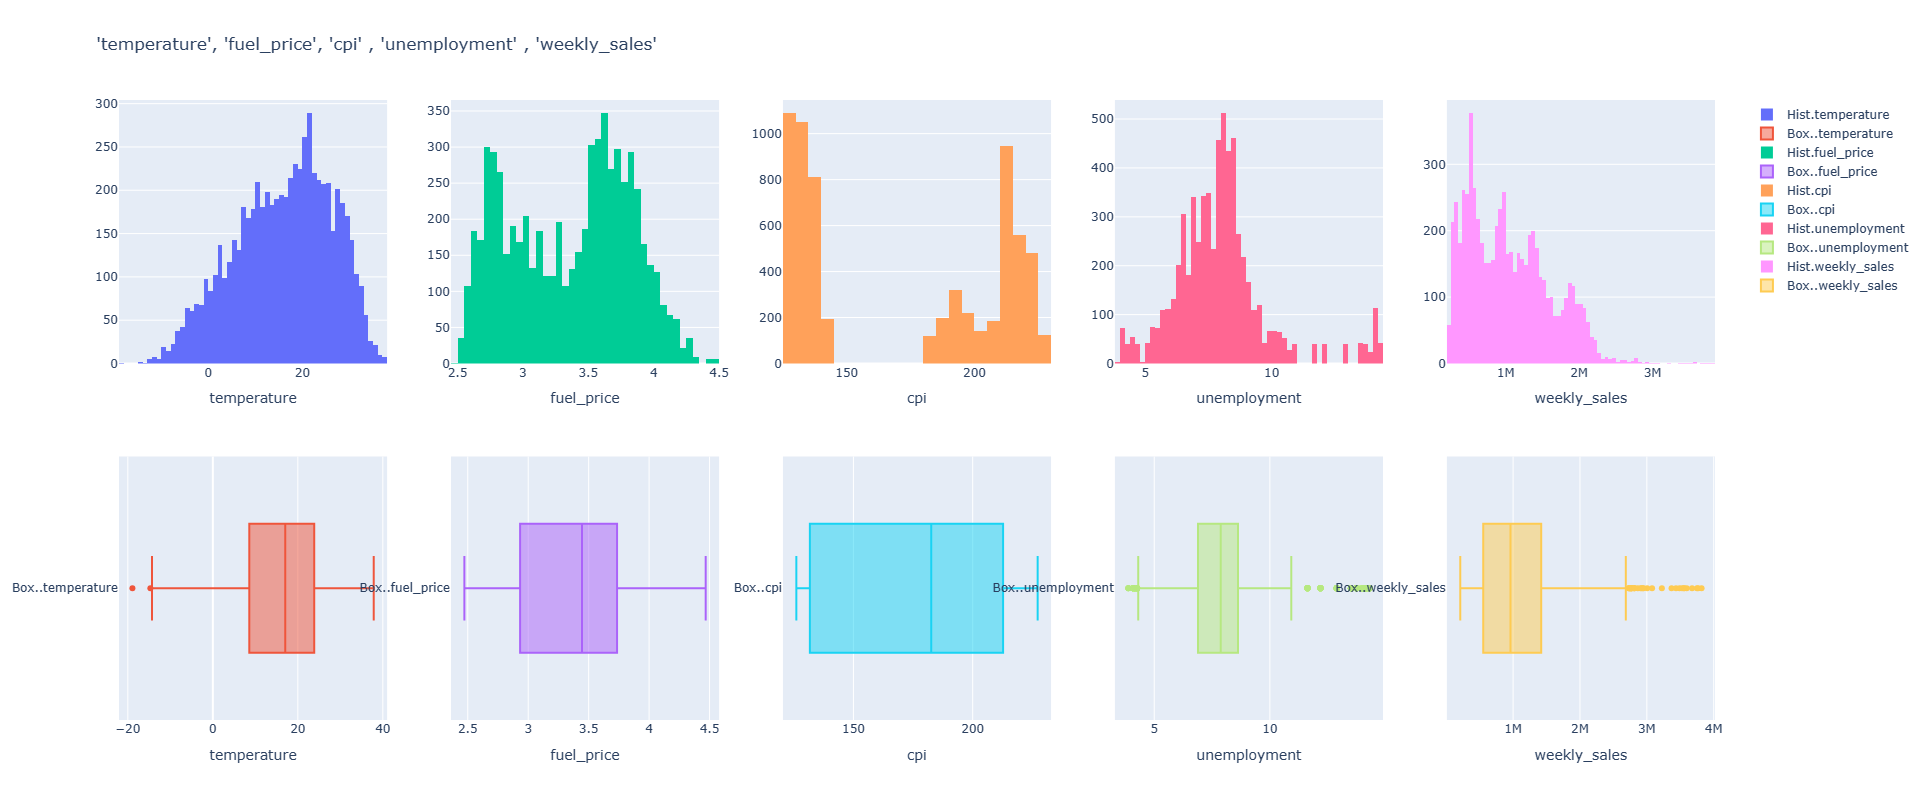

In [201]:
fig = make_subplots(rows=2, cols=5)

columns = ['temperature', 'fuel_price', 'cpi' , 'unemployment' , 'weekly_sales']

for i, col in enumerate(columns, start=1):
    fig.add_trace(go.Histogram(x=df[col], name=f'Hist.{col}' ), row=1, col=i)
    fig.add_trace(go.Box(x=df[col], name=f'Box..{col}'), row=2, col=i)
    fig.update_xaxes(title_text=col, row=1, col=i)
    fig.update_xaxes(title_text=col, row=2, col=i)
    
# Set the dark mode theme for the entire figure
pio.templates.default = "plotly_dark"
fig.update_layout(height=800, width=1900, title_text="'temperature', 'fuel_price', 'cpi' , 'unemployment' , 'weekly_sales'")
fig.show()

In [ ]:
for i in ['temperature', 'fuel_price' , 'cpi' , 'unemployment']:
    px.scatter( data_frame=df, x="weekly_sales", y=i , color="year", template='plotly_dark', title=f"weekly_sales vs {i}" , width=900 , height=500).show()
    print("")

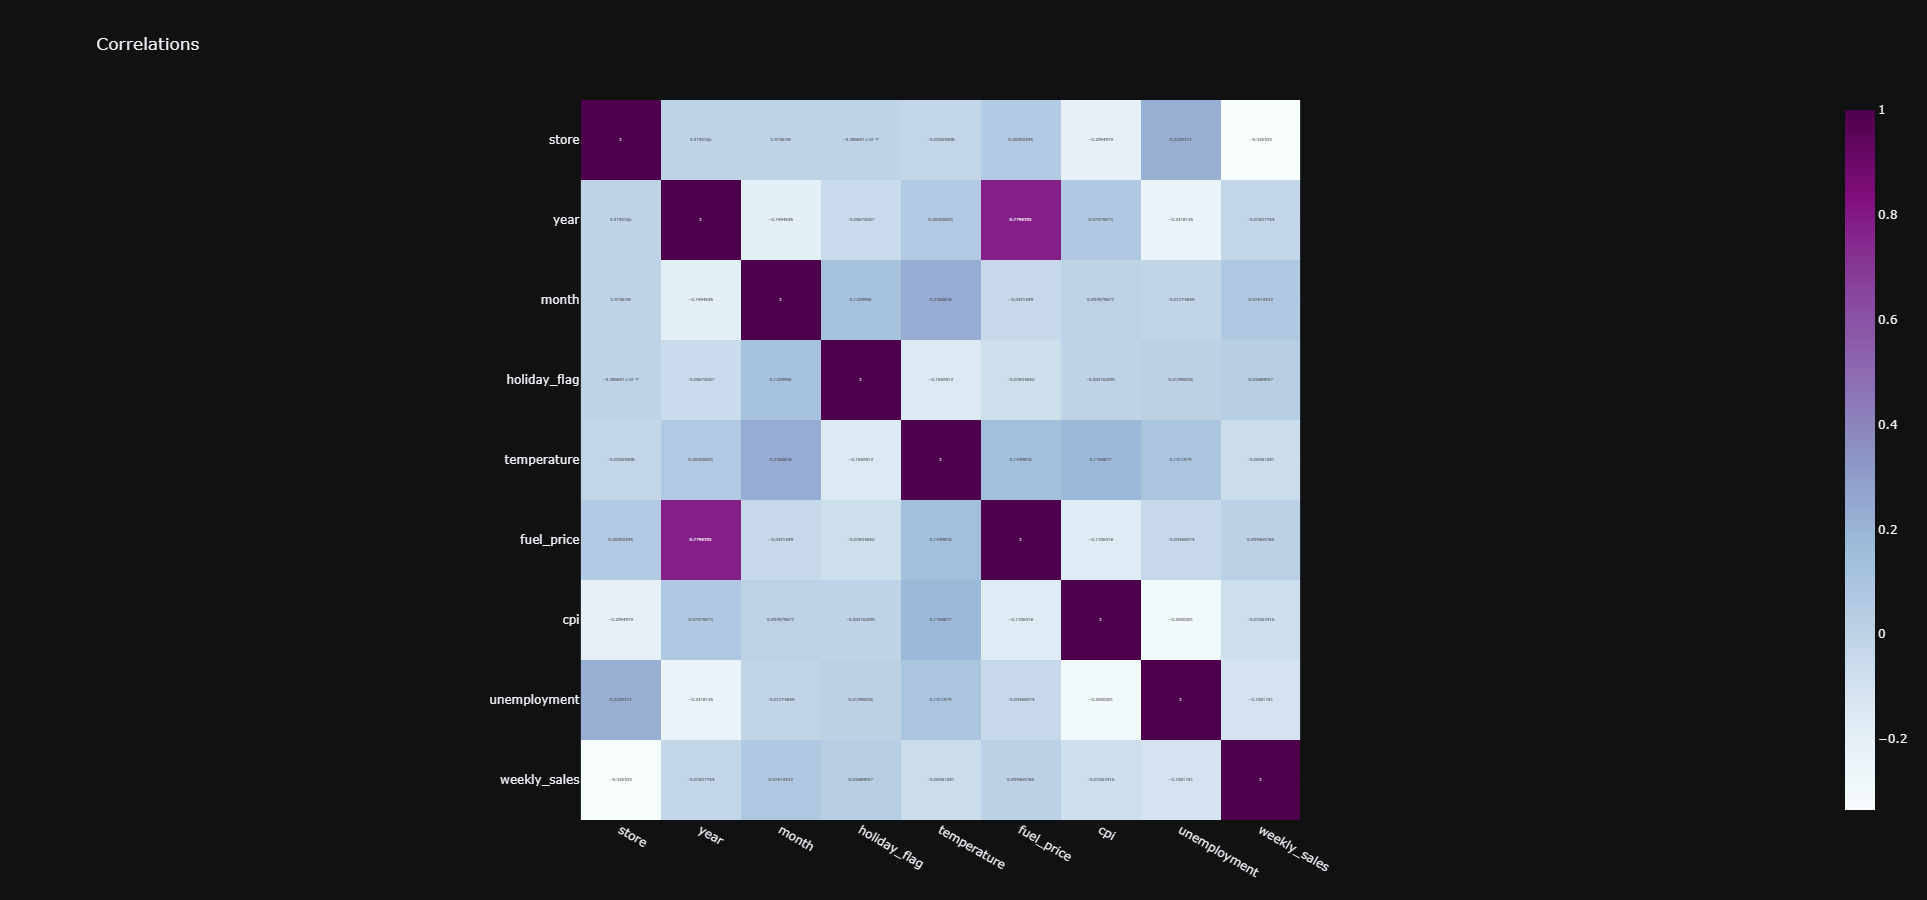

In [164]:
msk = df.select_dtypes(include='number').corr()
px.imshow(msk , template='plotly_dark' , text_auto=True , title='Correlations', color_continuous_scale='BuPu' , width=1200 , height=900)

#### 3.2) EDA : Univariate Analysis

In [25]:
df.head(1)

,store,date,year,year_month,month,day,season,holiday_flag,temperature_class,temperature,fuel_price,cpi,unemployment,weekly_sales
0,1,2010-02-05,2010,2010-02,2,Friday,Winter,0,1 Cold,5.73,2.57,211.10,8.11,1643690.90


In [ ]:
for i in ['year' , 'month' ,'season' ,'holiday_flag','temperature_class']:
    msk = df[i].value_counts().reset_index()
    px.bar(msk , x=i , y='count', template='plotly_dark' , title=f'Mean Weekly Sales vs ((({i})))' , width=1100 , height=500, text_auto=True ,color=i ).show()
    print('')

In [ ]:
# Value Count for categorical features
for i in ['store','year','month','holiday_flag']:
    msk = df[i].value_counts().reset_index()
    px.bar(msk, x=msk[i], y='count', template='plotly_dark',width=800,height=500,text_auto=True,title=f'Count of {i}',color=i).show()
    print('')

In [ ]:
# PD.CUT with value counts for Numiric feature
for i in ['temperature', 'fuel_price', 'cpi', 'unemployment', 'weekly_sales']:
    msk = pd.cut(df[i], bins=10,precision=1).value_counts().sort_index().reset_index()
    msk[i] = msk[i].apply(lambda x: str(x).replace('(','').replace(']','').replace(', ',' to '))
    px.bar(msk, x=msk[i], y='count', template='plotly_dark',width=800,height=500,text_auto=True,title=f'{i}',color=i).show()
    print('')

#### 3.3) EDA : Bivariate Analysis

In [20]:
df.head(1)

,store,date,year,year_month,month,day,season,holiday_flag,temperature_class,temperature,fuel_price,cpi,unemployment,weekly_sales
0,1,2010-02-05,2010,2010-02,2,Friday,Winter,0,1 Cold,5.73,2.57,211.10,8.11,1643690.90


In [ ]:
# Categorical
for i in ['store','year','month','season','holiday_flag','temperature_class']:
    msk = df.groupby( str(i) )['weekly_sales'].mean().reset_index().sort_values(by='weekly_sales', ascending=False)
    px.bar(msk , x=i , y='weekly_sales', template='plotly_dark' , width=800 , height=500 , text_auto=True , title=f'Sales Mean of {i}', color=i).show()
    print('')

In [ ]:
# Numeric
for i in ['temperature','fuel_price','cpi','unemployment']:
    msk = df.groupby(pd.cut(df[i] , bins=10 , precision=0))['weekly_sales'].mean().reset_index()
    msk[i] = msk[i].apply(lambda x: str(x).replace('(','').replace(']','').replace(', ',' to '))
    px.bar(msk , x=i , y='weekly_sales', template='plotly_dark' , width=800 , height=500 , text_auto=True , title=f'Sales Mean of {i}', color=i).show()
    print('')

#### 3.4) EDA : Multivariate Analysis

In [21]:
df.head(1)

,store,date,year,year_month,month,day,season,holiday_flag,temperature_class,temperature,fuel_price,cpi,unemployment,weekly_sales
0,1,2010-02-05,2010,2010-02,2,Friday,Winter,0,1 Cold,5.73,2.57,211.10,8.11,1643690.90


In [ ]:
for i in ['temperature','fuel_price','cpi','unemployment','weekly_sales']:      
    msk = df.groupby(['month','year_month','year'])[i].mean().reset_index().sort_values(by=['year','month'] , ascending=True)
    px.line(msk , x='month' , y=i , color='year' , template='plotly_dark' , width=1200 , height=500 , title=f'Mean of {i}').show()
    print('')

In [144]:
df.head(1)

,store,date,year,year_month,month,day,season,holiday_flag,temperature_class,temperature,fuel_price,cpi,unemployment,weekly_sales
0,1,2010-02-05,2010,2010-02,2,Friday,Winter,0,1 Cold,5.73,2.57,211.10,8.11,1643690.90


In [ ]:
# Yearly 'fuel_price','cpi','unemployment','weekly_sales' per temperature_class
for i in ['fuel_price','cpi','unemployment','weekly_sales']:      
    msk = df.groupby(['month','year','season','temperature_class'])[i].mean().reset_index()
    px.histogram(msk , x='temperature_class' , y=i , color='year' , template='plotly_dark' , width=1200 , height=500 , title=f'Mean of {i} pe temperature_class', barmode='group',text_auto=True).show()
    print('')

In [ ]:
# Yearly 'fuel_price','cpi','unemployment','weekly_sales' per temperature_class
for i in ['temperature','fuel_price','cpi','unemployment','weekly_sales']:      
    msk = df.groupby(['month','year','season','temperature_class'])[i].mean().reset_index()
    px.histogram(msk , x='season' , y=i , color='year' , template='plotly_dark' , width=1200 , height=500 , title=f'Mean of {i} per year', barmode='group',text_auto=True).show()
    print('')

In [ ]:
# Yearly 'fuel_price','cpi','unemployment','weekly_sales' per temperature_class
for i in ['temperature','fuel_price','cpi','unemployment','weekly_sales']:      
    msk = df.groupby(['month','year','season','temperature_class','store'])[i].mean().reset_index()
    px.histogram(msk , x='store' , y=i , color='year' , template='plotly_dark' , width=1700 , height=600 , title=f'Mean of {i} per year', barmode='group',text_auto=True , nbins=45).show()
    print('')

In [202]:
def Cross_Tab(idx , col , val , func):
    return pd.crosstab(index=df[idx],columns=df[col] , values=df[val] , aggfunc=func).replace(np.nan , 0).style.background_gradient(cmap='coolwarm')

pd.options.display.float_format = '{:.2f}'.format

# Cross_Tab Season vs Year
Cross_Tab('season' , 'year' , 'weekly_sales' , 'mean')

year,2010,2011,2012
season,,,
Fall,1020996.735949,1050036.540923,1013908.958028
Spring,1025714.709214,1004326.696444,1041362.454513
Summer,1046951.126889,1039801.908222,1055508.805349
Winter,1182946.952494,1090792.131932,1002661.253333


In [203]:
# Cross_Tab Season vs Year
Cross_Tab('month' , 'year' , 'weekly_sales' , 'mean')

year,2010,2011,2012
month,,,
1,0.000000,909466.482389,938302.620333
2,1057405.461333,1035174.043722,1067019.886333
3,1010665.569444,996424.712722,1028931.779956
4,1028499.413556,1006784.493200,1049560.588611
5,1037282.968556,1009156.434222,1048702.663611
6,1068034.290889,1054296.584389,1069379.241289
7,1033689.448800,1021828.439422,1041719.180000
8,1042445.060500,1047774.068056,1052670.069689
9,984821.646500,981545.504089,1003586.358167


In [204]:
# Cross_Tab store vs Year
Cross_Tab('store' , 'year' , 'weekly_sales' , 'mean')

year,2010,2011,2012
store,,,
1,1526642.333333,1556190.746731,1586094.372558
2,1984955.503958,1896305.411923,1895271.985349
3,390529.562500,400324.549423,419173.011628
4,1993343.141875,2136390.256346,2157469.517209
5,309083.974375,316746.538462,329507.863488
6,1602340.014375,1548630.056731,1542210.395349
7,532668.294792,589666.163846,589943.173721
8,900093.225833,913707.426154,912416.747209
9,523525.411667,551653.262500,557535.571628


#### 3.5) EDA : Correlation & Feature Selection

In [205]:
df.select_dtypes(include='number').corr().style.background_gradient(cmap='coolwarm')

,store,year,month,holiday_flag,temperature,fuel_price,cpi,unemployment,weekly_sales
store,1.000000,0.000000,0.000000,-0.000000,-0.022659,0.060023,-0.209492,0.223531,-0.335332
year,0.000000,1.000000,-0.194465,-0.056783,0.064269,0.779470,0.074796,-0.241813,-0.018378
month,0.000000,-0.194465,1.000000,0.122996,0.235862,-0.042156,0.004980,-0.012746,0.076143
holiday_flag,-0.000000,-0.056783,0.122996,1.000000,-0.155091,-0.078347,-0.002162,0.010960,0.036891
temperature,-0.022659,0.064269,0.235862,-0.155091,1.000000,0.144982,0.176888,0.101158,-0.063810
fuel_price,0.060023,0.779470,-0.042156,-0.078347,0.144982,1.000000,-0.170642,-0.034684,0.009464
cpi,-0.209492,0.074796,0.004980,-0.002162,0.176888,-0.170642,1.000000,-0.302020,-0.072634
unemployment,0.223531,-0.241813,-0.012746,0.010960,0.101158,-0.034684,-0.302020,1.000000,-0.106176
weekly_sales,-0.335332,-0.018378,0.076143,0.036891,-0.063810,0.009464,-0.072634,-0.106176,1.000000


In [206]:
# Correlation Matrix
df.select_dtypes(include='number').corrwith(df.weekly_sales).sort_values(ascending=False)

weekly_sales    1.00
month           0.08
holiday_flag    0.04
fuel_price      0.01
year           -0.02
temperature    -0.06
cpi            -0.07
unemployment   -0.11
store          -0.34
dtype: float64

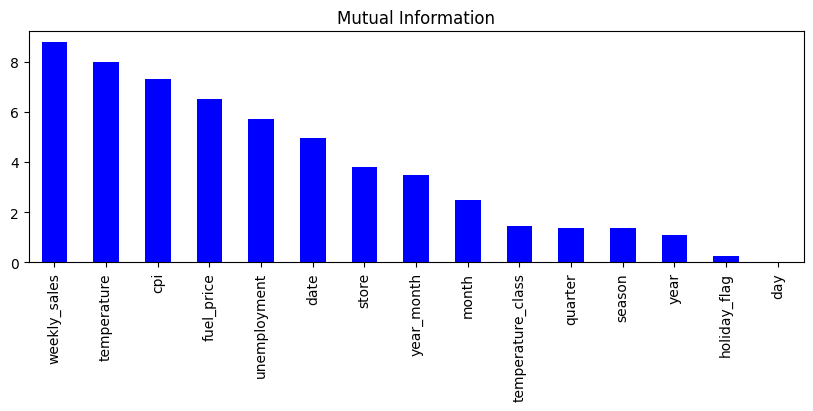

In [207]:
# Metual Infor Score
from sklearn.metrics import mutual_info_score
def MI_Score(x):
    return mutual_info_score(x,df.weekly_sales)
df.apply(MI_Score).sort_values(ascending=False).plot.bar(figsize=(10,3),color='blue',title='Mutual Information');

### 4) Preprocessing

In [14]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
import pickle

from sklearn.preprocessing import StandardScaler , OrdinalEncoder , RobustScaler , PolynomialFeatures
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer

In [15]:
df.head(1)

,store,date,year,quarter,year_month,month,day,season,holiday_flag,temperature_class,temperature,fuel_price,cpi,unemployment,weekly_sales
0,1,2010-02-05,2010,Q1,2010-02,2,Friday,Winter,0,1 Cold,5.73,2.57,211.10,8.11,1643690.90


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   store              6435 non-null   int64         
 1   date               6435 non-null   datetime64[ns]
 2   year               6435 non-null   int32         
 3   quarter            6435 non-null   object        
 4   year_month         6435 non-null   object        
 5   month              6435 non-null   int32         
 6   day                6435 non-null   object        
 7   season             6435 non-null   object        
 8   holiday_flag       6435 non-null   int64         
 9   temperature_class  6435 non-null   object        
 10  temperature        6435 non-null   float64       
 11  fuel_price         6435 non-null   float64       
 12  cpi                6435 non-null   float64       
 13  unemployment       6435 non-null   float64       
 14  weekly_s

In [17]:
# Re-casting features
df['date'] = df['date'].dt.strftime("%Y-%m-%d")
df.store = df.store.astype('object')
df.year = df.year.astype('object')
df.month = df.month.astype('object')
df.holiday_flag = df.holiday_flag.astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   store              6435 non-null   object 
 1   date               6435 non-null   object 
 2   year               6435 non-null   object 
 3   quarter            6435 non-null   object 
 4   year_month         6435 non-null   object 
 5   month              6435 non-null   object 
 6   day                6435 non-null   object 
 7   season             6435 non-null   object 
 8   holiday_flag       6435 non-null   object 
 9   temperature_class  6435 non-null   object 
 10  temperature        6435 non-null   float64
 11  fuel_price         6435 non-null   float64
 12  cpi                6435 non-null   float64
 13  unemployment       6435 non-null   float64
 14  weekly_sales       6435 non-null   float64
dtypes: float64(5), object(10)
memory usage: 754.2+ KB


In [18]:
# Model Visualization
def dist_plot(Y , Y_PRED , title):
    plt.figure(figsize=(14, 6))
    Accur = r2_score(Y , Y_PRED).round(2)
    ax1 = sns.distplot(Y, hist = False, color = "b", label = f'Actual Values)')
    ax2 = sns.distplot(Y_PRED, hist = False, color = "r", label = f'Predicted Values (Score : {Accur}', ax = ax1)
    plt.title(title, size = 18)
    plt.legend()
    plt.show()

drop_cols = ['temperature_class' , 'date' , 'year_month' ,'quarter'] # , 'year'
ml_df = df.copy().drop(drop_cols , axis=1)

cat = ml_df.select_dtypes(include='object').columns.tolist()
num = ml_df.select_dtypes(include='number').drop('weekly_sales' , axis = 1).columns.tolist()

x = ml_df.drop('weekly_sales' , axis = 1)
y = ml_df.weekly_sales

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 42 , shuffle = True)

num_pip = Pipeline(steps=[
                        ('imputer' , SimpleImputer(strategy='median')),
                        ('scaler' , RobustScaler())  ])

cat_pip = Pipeline(steps=[
                        ('imputer' , SimpleImputer(strategy='most_frequent')),
                        ('encoder' , BinaryEncoder()) ])

preprocessor = ColumnTransformer(transformers=[
                        ('num' , num_pip , num),
                        ('cat' , cat_pip , cat) ]).set_output(transform='pandas')

x_train_procs = preprocessor.fit_transform(x_train)
x_test_procs = preprocessor.transform(x_test)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['temperature', 'fuel_price', 'cpi',
                                  'unemployment']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', BinaryEncoder())]),
                                 ['store', 'year', 'month', 'day', 'season',
                                  'holiday_flag'])])

In [19]:
cat

['store', 'year', 'month', 'day', 'season', 'holiday_flag']

In [20]:
num

['temperature', 'fuel_price', 'cpi', 'unemployment']

In [21]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   object 
 1   year          6435 non-null   object 
 2   month         6435 non-null   object 
 3   day           6435 non-null   object 
 4   season        6435 non-null   object 
 5   holiday_flag  6435 non-null   object 
 6   temperature   6435 non-null   float64
 7   fuel_price    6435 non-null   float64
 8   cpi           6435 non-null   float64
 9   unemployment  6435 non-null   float64
 10  weekly_sales  6435 non-null   float64
dtypes: float64(5), object(6)
memory usage: 553.1+ KB


In [22]:
display(x_train_procs.head(1))

,num__temperature,num__fuel_price,num__cpi,num__unemployment,cat__store_0,cat__store_1,cat__store_2,cat__store_3,cat__store_4,cat__store_5,...,cat__month_0,cat__month_1,cat__month_2,cat__month_3,cat__day_0,cat__season_0,cat__season_1,cat__season_2,cat__holiday_flag_0,cat__holiday_flag_1
1033,0.47,-1.10,0.40,-0.90,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1


In [23]:
display(x_train_procs.head(1))

,num__temperature,num__fuel_price,num__cpi,num__unemployment,cat__store_0,cat__store_1,cat__store_2,cat__store_3,cat__store_4,cat__store_5,...,cat__month_0,cat__month_1,cat__month_2,cat__month_3,cat__day_0,cat__season_0,cat__season_1,cat__season_2,cat__holiday_flag_0,cat__holiday_flag_1
1033,0.47,-1.10,0.40,-0.90,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1


### 5) Modeling

#### 5.1) Linear Regression

Mean_Squared_Error Test:  281573136770.12
R2_score Test 0.13
Train Score :  0.11
Test Score :  0.13


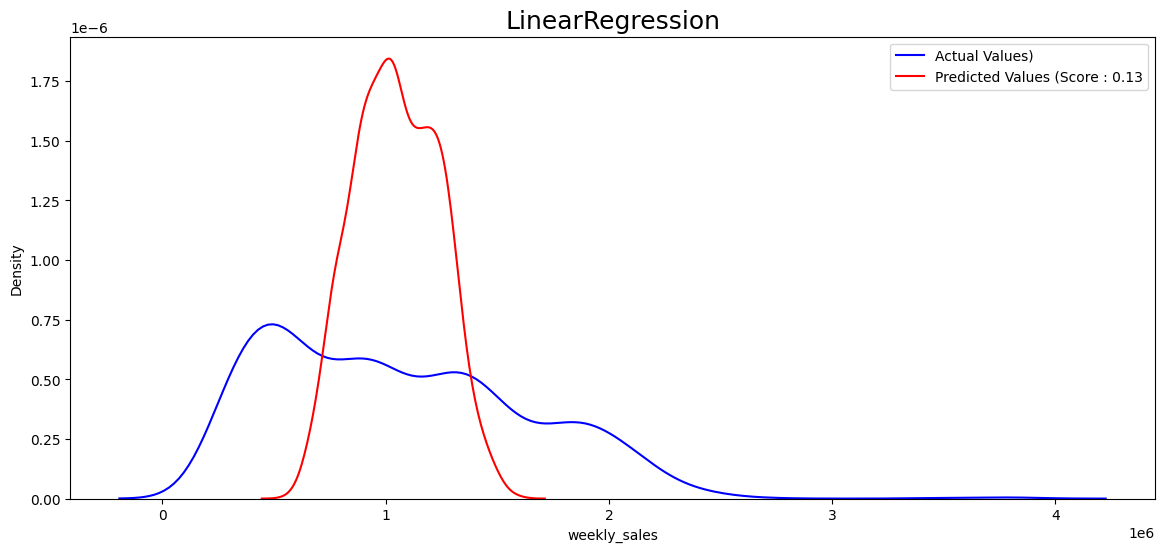

In [24]:
LR = LinearRegression( )
LR.fit(x_train_procs , y_train)

y_pred_LR = LR.predict(x_test_procs)

print("Mean_Squared_Error Test: ",mean_squared_error(y_test , y_pred_LR).round(2))
print("R2_score Test" , r2_score(y_test , y_pred_LR).round(2))
print("Train Score : " , LR.score(x_train_procs , y_train).round(2))
print("Test Score : " ,LR.score(x_test_procs , y_test).round(2))

dist_plot(y_test , y_pred_LR , 'LinearRegression')

In [ ]:
ridge = Ridge()
ridge.fit(x_train_procs , y_train)

# Prediction
y_pred_reidge = ridge.predict(x_test_procs)

print("train ridge score : ",ridge.score(x_train_procs , y_train))
print("test ridge score : ",ridge.score(x_test_procs , y_test))
print("RMSE ",np.sqrt(mean_squared_error(y_test , y_pred_reidge)))
print("r2_score ",r2_score(y_test , y_pred_reidge))

dist_plot(y_test , y_pred_reidge , 'ridge')

In [ ]:
# Gread Search
LR_Sr = LinearRegression( )
Params_LR = { 
    "fit_intercept" :[True , False] ,
    "positive" : [True , False] }

Grid_LR = GridSearchCV(
    estimator = LR_Sr,
    param_grid = Params_LR,
    n_jobs=-1)

Grid_LR.fit(x_train_procs, y_train)
print("Best_Parameter : " , Grid_LR.best_params_)
print("Best_Score : " , Grid_LR.best_score_)

#### 5.2) Lasso

In [ ]:
# Lasso
LS = Lasso()
LS.fit(x_train_procs , y_train)
y_pred_LS = LS.predict(x_test_procs)

print("MSE" ,mean_squared_error(y_test , y_pred_LS) )
print("r2_score : " , r2_score(y_test , y_pred_LS) )
print("score : " , LS.score(x_test_procs , y_test ) )

dist_plot(y_test , y_pred_LS , 'Lasso')

#### 5.3) PolynomialFeatures

In [ ]:
# PolPolynomialFeatures
Poly = PolynomialFeatures(degree=3 , include_bias=False)
x_train_poly = Poly.fit_transform(x_train_procs)
x_test_poly = Poly.transform(x_test_procs)

LR.fit(x_train_poly , y_train)
y_pred_poly = LR.predict(x_test_poly)

print("Mean_Squared_Error Test: ",mean_squared_error(y_test , y_pred_poly).round(2))
print("R2_score Test" , r2_score(y_test , y_pred_poly).round(2))
print("Train Score : " , LR.score(x_train_poly , y_train).round(2))
print("Test Score : " ,LR.score(x_test_poly , y_test).round(2))

dist_plot(y_test , y_pred_poly , 'PolynomialFeatures')

#### 5.4) Crossvalidation with linear regression

In [ ]:
# Crossvalidation with linear regression
LR = LinearRegression(fit_intercept=True )
cv_score_lr = cross_val_score(LR , x_train_procs , y_train , cv=5 , scoring='r2' , n_jobs=-1)

print("Score : " , cv_score_lr)
print("Mean of Score : " , np.mean(cv_score_lr).round(2))

#### 5.5) Crossvalidation with XGBRegressor

In [ ]:
# Crossvalidation with XGBRegressor
XGBR = XGBRegressor(max_depth=6 , max_leaves=24 , n_estimators=50 ,random_state=42)
cv_score_lr = cross_val_score(XGBR , x_train_procs , y_train , cv=5 , scoring='r2' , n_jobs=-1)

print("Score : " , cv_score_lr)
print("Mean of Score : " , np.mean(cv_score_lr).round(2))

#### 5.6) XGBRegressor

✔️ mean_squared_error :  15752028309.25333
✔️ r2_score  0.9511041281468035
✔️ train_Score  0.9714226683156093
✔️ test_Score  0.9511041281468035


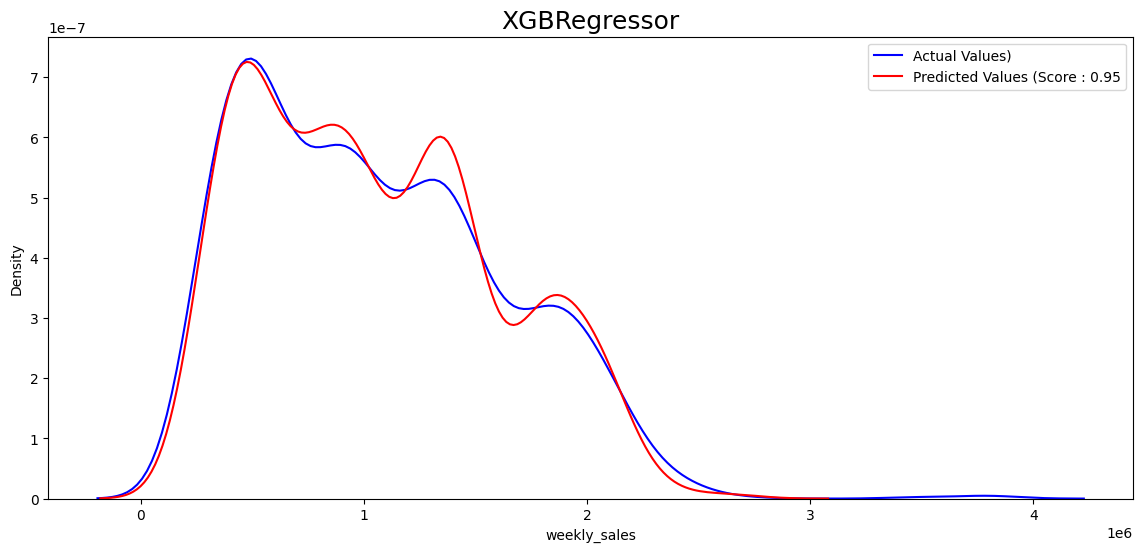

In [25]:
XGBR = XGBRegressor(max_depth=6 , max_leaves=24 , n_estimators=50 ,random_state=42)
XGBR.fit(x_train_procs , y_train)
y_pred_XGBR = XGBR.predict(x_test_procs)

print("✔️ mean_squared_error : ",mean_squared_error(y_test , y_pred_XGBR))
print("✔️ r2_score ",r2_score(y_test , y_pred_XGBR))
print("✔️ train_Score ",XGBR.score(x_train_procs , y_train))
print("✔️ test_Score ",XGBR.score(x_test_procs , y_test))

dist_plot(y_test , y_pred_XGBR , 'XGBRegressor')

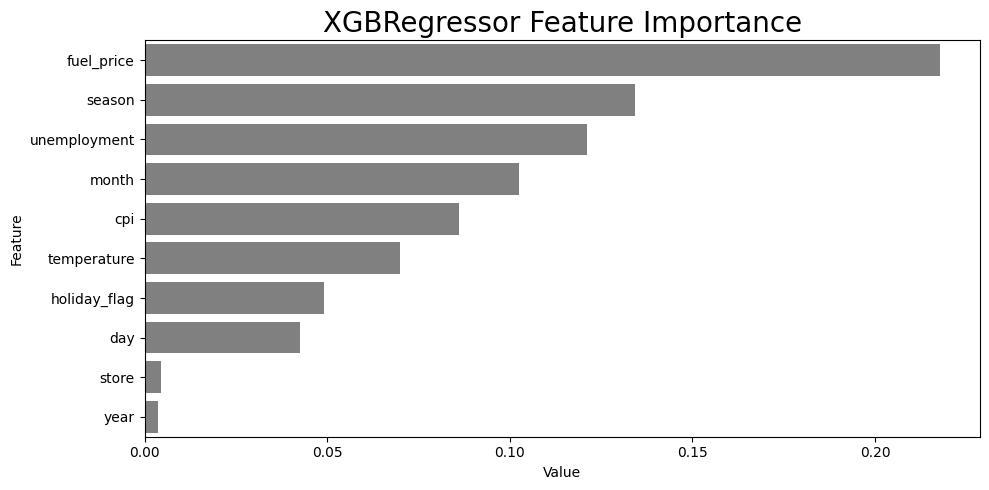

In [26]:
sorted(zip(XGBR.feature_importances_, x_train.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(XGBR.feature_importances_,x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False) , color='gray')
plt.title(label= 'XGBRegressor Feature Importance', size = 20)
plt.tight_layout()
plt.show()

##### Test Model

In [27]:
TEST = x_test.sample(1)
TEST_IDX = TEST.index
TEST_Data = df.loc[TEST_IDX][['weekly_sales']].reset_index()

TEST_Procc = preprocessor.transform(TEST)
TEST_PRED = XGBR.predict(TEST_Procc)
TEST_Data['weekly_sales_Pred'] = TEST_PRED[0]

TEST_Data

,index,weekly_sales,weekly_sales_Pred
0,2742,1955896.59,2058991.25


### 6) Save Model

In [28]:
# Define the Model
model = XGBR

import joblib as jb
jb.dump(model , "XGBR.h5")
jb.dump(preprocessor , "preprocessor.h5")

['preprocessor.h5']

In [29]:
# Copy DataFrame for Streamlit Deployment
df_new = df.copy()
df_new.head(1)

# Handing Dates
df_new.date = pd.to_datetime(df_new.date, format = '%Y-%m-%d')
df_new['year'] = df_new.date.dt.year
df_new['month'] = df_new.date.dt.month
df_new['day'] = df_new.date.dt.day_name()
df_new['year_month'] = df_new['date'].dt.strftime('%Y-%m')

# Save new output to new CSV file
df_new.to_csv("new_df.csv")

# Check columns informations
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   store              6435 non-null   object        
 1   date               6435 non-null   datetime64[ns]
 2   year               6435 non-null   int32         
 3   quarter            6435 non-null   object        
 4   year_month         6435 non-null   object        
 5   month              6435 non-null   int32         
 6   day                6435 non-null   object        
 7   season             6435 non-null   object        
 8   holiday_flag       6435 non-null   object        
 9   temperature_class  6435 non-null   object        
 10  temperature        6435 non-null   float64       
 11  fuel_price         6435 non-null   float64       
 12  cpi                6435 non-null   float64       
 13  unemployment       6435 non-null   float64       
 14  weekly_s

In [192]:
%%writefile app.py
# EDA Packages
import pandas as pd
import numpy as np
import joblib as jb
import plotly.express as px
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio # for new templates
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

# Modeling Packagaes
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
import pickle
from sklearn.preprocessing import StandardScaler , OrdinalEncoder , RobustScaler , PolynomialFeatures
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer

# Deployment Package
import streamlit as st
# ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# Raad csv for deployment & Set Page configration
df_new = pd.read_csv("new_df.csv").drop('Unnamed: 0',axis=1).sort_values(by=['date' , 'store'], ascending=True).reset_index(drop=True)
st.set_page_config(page_title='Walmart Predection Project' , layout = 'wide' , page_icon = '📊')
st.title('📊 Walmart Sales Predection Project 🎯')

Brief = st.sidebar.checkbox(":blue[Brief About Data]")
Planning = st.sidebar.checkbox(":orange[About Project]")
About_me = st.sidebar.checkbox(":green[About Me]")
# ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# Brief
if Brief:
    st.sidebar.markdown(":blue[Brief About Data]")
    st.sidebar.write("""
    * One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. 
    * There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. 
    * The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. 
    
    * An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.
    * :red[So let us see the insights 👀.]
    """)
# ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# About Project
if Planning:
    st.sidebar.markdown(":orange[About Project]")
    st.sidebar.write("""
    * Project Source: https://www.kaggle.com/datasets/yasserh/walmart-dataset
    * This is a project during Data Science Bootcamp @ZeroGrad under Mentoring of : Eng. Ahmed Mostafa
    * ZeroGrad:
        * Website: https://zero-grad.com/
        * Linkedin: https://www.linkedin.com/company/zero-grad
        * Youtube: https://www.youtube.com/c/zerograd
    """)
# ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
if About_me :
    st.sidebar.markdown(":green[About me]")
    st.sidebar.write("""
    - Osama SAAD
    - Infor Master Data Management and Assets Control Section Head
        - Ibnsina Pharma
    - LinkedIn: 
        https://www.linkedin.com/in/osama-saad-samnudi/
    - Github : 
        https://github.com/OsamaSamnudi
    """)
#_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Tabs
Exploration , Insights , Dashboard , Prediction = st.tabs(['🔬 Exploration' , '💡 Insights' , '📊 Dashboard' , '🎯 Prediction'])
with Exploration:
    st.header('Exploration')
    with st.container():
        st.success('Sample of Data')
        st.dataframe(data= df_new.sample(10) , use_container_width=True)
        Data_00 , Data_01 , Data_02 = st.columns([70,3,55])
        with Data_00:
            st.success('Describe Numerical')
            st.dataframe(data= df_new.describe(include = 'number').replace(np.nan , '') , use_container_width=True)
        with Data_02:
            st.success('Describe Categorical')
            st.dataframe(data= df_new.describe(exclude = 'number') , use_container_width=True)
        
        Expl_00 , Expl_01 , Expl_02 = st.columns([50,50,50])
        def Cross_Tab(data , idx , col , val , func):
            return pd.crosstab(index=data[idx],columns=data[col] , values=data[val] , aggfunc=func).replace(np.nan , 0).style.background_gradient(cmap='twilight_shifted')
        with Expl_00:
            st.success('Avg Sales per Store in from Store Number 1 to 15')
            # Cross_Tab Season vs Year
            Plot_1 = Cross_Tab(df_new[df_new['store'].isin(range(1,16))] ,'store' , 'year' , 'weekly_sales' , 'mean')
            st.dataframe(data= Plot_1, use_container_width=True , height=600)

        with Expl_01:
            st.success('Avg Sales per Store in from Store Number 16 to 30')
            # Cross_Tab Season vs Year
            Plot_2 = Cross_Tab(df_new[df_new['store'].isin(range(16,31))] ,'store' , 'year' , 'weekly_sales' , 'mean')
            st.dataframe(data= Plot_2, use_container_width=True , height=600)

        with Expl_02:
            st.success('Avg Sales per Store in from Store Number 31 to 44')
            # Cross_Tab Season vs Year
            Plot_3 = Cross_Tab(df_new[df_new['store'].isin(range(31,45))] ,'store' , 'year' , 'weekly_sales' , 'mean')
            st.dataframe(data= Plot_3, use_container_width=True, height=600)

    with st.container():
        Expl_03 , Expl_04 , Expl_05 , Expl_06 = st.columns([75,60,65,60])
        with Expl_03:
            st.success('Avg Sales per month based on year')
            # Cross_Tab Season vs Year
            Plot_4 = Cross_Tab(df_new ,'month' , 'year' , 'weekly_sales' , 'mean')
            st.dataframe(data= Plot_4, use_container_width=True, height=500)

        with Expl_04:
            st.success('Avg Sales per season based on year')
            # Cross_Tab Season vs Year
            Plot_5 = Cross_Tab(df_new , 'season' , 'year' , 'weekly_sales' , 'mean')
            st.dataframe(data= Plot_5, use_container_width=True, height=200)

        with Expl_05:
            st.success('Avg Sales per temperature_class based on year')
            # Cross_Tab Season vs Year
            Plot_6 = Cross_Tab(df_new , 'temperature_class' , 'year' , 'weekly_sales' , 'mean')
            st.dataframe(data= Plot_6, use_container_width=True, height=260)

        with Expl_06:
            st.success('Avg Sales per holiday_flag based on year')
            # Cross_Tab Season vs Year
            Plot_7 = Cross_Tab(df_new , 'holiday_flag' , 'year' , 'weekly_sales' , 'mean')
            st.dataframe(data= Plot_7, use_container_width=True, height=150)

    with st.container():
        Expl_07 , Expl_08 , Expl_09 = st.columns([60,60,60])
        Fig_1 = px.histogram(df_new , x = 'temperature', text_auto=True , marginal='box' , title = "dist of temperature" , color_discrete_sequence= px.colors.qualitative.Dark24_r)
        Fig_2 = px.histogram(df_new , x = 'fuel_price', text_auto=True , marginal='box', title = "dist of fuel_price" , color_discrete_sequence=['darkseagreen'])
        Fig_3 = px.histogram(df_new , x = 'cpi', text_auto=True , marginal='box', title = "dist of cpi" , color_discrete_sequence= px.colors.qualitative.Bold)
        with Expl_07:
            st.plotly_chart(Fig_1 , use_container_width=True)
        with Expl_08:
            st.plotly_chart(Fig_2 , use_container_width=True)
        with Expl_09:
            st.plotly_chart(Fig_3 , use_container_width=True)
            
    with st.container():
        Expl_10 , Expl_11 , Expl_12 = st.columns([60,10,60])
        Fig_4 = px.histogram(df_new , x = 'unemployment', text_auto=True , marginal='box', title = "dist of unemployment" , color_discrete_sequence= px.colors.qualitative.G10)
        Fig_5 = px.histogram(df_new , x = 'weekly_sales', text_auto=True , marginal='box', title = "dist of weekly_sales" , color_discrete_sequence= px.colors.qualitative.Antique)
        with Expl_10:
            st.plotly_chart(Fig_4 , use_container_width=True)
        with Expl_12:
            st.plotly_chart(Fig_5 , use_container_width=True)

    with st.container():
            corr = df_new.select_dtypes(include='number').corr()
            IMSHOW = px.imshow(corr , width=1200,height=1200,text_auto=True,title='Correlation' , color_continuous_scale='viridis')
            IMSHOW.update_layout(annotations=[dict(font_size=90)])
            st.plotly_chart(IMSHOW , use_container_width=True)
#_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

with Insights:
    st.header('Insights')
    st.warning("""
    - Feature Correlation Analysis:
        - This section aims to uncover correlations between various features and the target variable "Weekly Sales," providing valuable insights for decision-makers.
        - We will visually explore patterns observed during our Exploratory Data Analysis (EDA) of sales across different time periods, encompassing year, quarter, month, season, holidays, and temperature categories.
    """, icon="🚩")
    with st.container():
        In_0, In_1, In_2 = st.columns([150,80,80])
        with In_0:
            st.subheader("Over view Monthly Transactions Count/Year")
            Cross_tab =pd.crosstab(index=df_new['year'] , columns=df_new['month'] , values=df_new['month'] , aggfunc= 'count',margins=True).reset_index().replace(np.nan,0)
            st.dataframe(Cross_tab , column_config={"year": st.column_config.TextColumn("year"),"All": st.column_config.ProgressColumn("All",format="%f",min_value=0,max_value=max(Cross_tab.All),)},hide_index=True,use_container_width=True)
        with In_1:
            st.subheader("Over view weekly_sales/Year")
            Years_Sales = df_new.groupby(['year'])['weekly_sales'].sum().sort_values(ascending=False).reset_index()
            st.dataframe(Years_Sales,column_order=("year", "weekly_sales"),
                         hide_index=True,width=None,use_container_width=True,
                         column_config={"year":st.column_config.TextColumn("year"),"weekly_sales":st.column_config.ProgressColumn("weekly_sales",format="%f", min_value=0, max_value=max(Years_Sales.weekly_sales),)})
        with In_2:
            st.subheader("Over view weekly_sales/season")
            Season_Sales = df_new.groupby(['season'])['weekly_sales'].sum().sort_values(ascending=False).reset_index()
            st.dataframe(Season_Sales,column_order=("season", "weekly_sales"), 
                        hide_index=True,width=None,use_container_width=True,
                        column_config={"season": st.column_config.TextColumn("season"),"weekly_sales": st.column_config.ProgressColumn("weekly_sales",format="%f",min_value=0,max_value=max(Season_Sales.weekly_sales),)})    
    with st.container():
        with In_0:
            st.success("""
                * It becomes evident that:
                * 2011 emerges as the top sales year, boasting the highest figures.
                    * Although 2012 shows lower sales, it's worth noting that data for the entire year isn't available.
                    * The absence of data for January 2010 may impact insights for that year.
                * Overall, summer emerges as the peak season for sales.
                * Store No. 20 ranks highest in sales over the three-year period.
                * Conversely, Store No. 33 exhibits lower sales across the same timeframe.
                * Sales during holidays are lower compared to regular working days, suggesting that customers may utilize holidays for activities other than making purchases.
                * Moderate weather conditions appear to be optimal for sales, with both cold and warm weather showing similar levels of sales.""")
        with In_1:
            st.subheader("Summary")
            Total_Sales = df_new.weekly_sales.sum()
            AVG_Sales = df_new.weekly_sales.mean()
            Total_Transactions = df_new.weekly_sales.count()
            Total_Stores = df_new.store.nunique()
            st.metric(label="Total Sales", value=round(Total_Sales,2))
            st.metric(label="AVG_Sales", value=round(AVG_Sales,2))
            st.metric(label="Total_Transactions", value=round(Total_Transactions,2))
            st.metric(label="Total_Stores", value=round(Total_Stores,2))   
        with In_2:
            st.subheader("Over view weekly_sales/Store")
            Store_Sales = df_new.groupby(['store'])['weekly_sales'].sum().sort_values(ascending=False).reset_index()
            st.dataframe(Store_Sales,column_order=("store", "weekly_sales"),
                         hide_index=True,width=None,use_container_width=True,
                         column_config={"store":st.column_config.TextColumn("store"),"weekly_sales":st.column_config.ProgressColumn("weekly_sales",format="%f", min_value=0, max_value=max(Store_Sales.weekly_sales),)})
    with st.container():
        In_3, In_4, In_5 , In_6 = st.columns([60,70,70,70])
        Main_Ins_Data = df_new.groupby(['year','quarter','month','season','holiday_flag','temperature_class'])[['fuel_price','cpi','unemployment','weekly_sales']].mean().reset_index()
        Fuel_Q = px.histogram(Main_Ins_Data , x='quarter' , y='fuel_price',color='year' , text_auto=True , barmode='group', title='AVG fuel_price/quarter')
        CPI_Q = px.histogram(Main_Ins_Data , x='quarter' , y='cpi',color='year' , text_auto=True , barmode='group', title='AVG cpi/quarter')
        UnEmp_Q = px.histogram(Main_Ins_Data , x='quarter' , y='unemployment',color='year' , text_auto=True , barmode='group', title='AVG unemployment/quarter')
        
        Sales_month = px.histogram(Main_Ins_Data , x='month' , y='weekly_sales',color='year' , text_auto=True , barmode='group', title='AVG weekly_sales/month')
        Sales_season = px.histogram(Main_Ins_Data , x='season' , y='weekly_sales',color='year' , text_auto=True , barmode='group', title='AVG weekly_sales/season')
        Sales_holiday_flag = px.histogram(Main_Ins_Data , x='holiday_flag' , y='weekly_sales',color='year' , text_auto=True , barmode='group', title='AVG weekly_sales/holiday_flag')
        Sales_temperature_class = px.histogram(Main_Ins_Data , x='temperature_class' , y='weekly_sales',color='year' , text_auto=True , barmode='group', title='AVG weekly_sales/temperature_class')
        
        In_5_2 = px.histogram(Main_Ins_Data , x='quarter' , y='weekly_sales',color='year' , text_auto=True , barmode='group', title='AVG weekly_sales/quarter')
        with In_3:
            st.plotly_chart(Fuel_Q , use_container_width=True)
            st.plotly_chart(Sales_month , use_container_width=True)
        with In_4: # fuel_price
            st.plotly_chart(CPI_Q , use_container_width=True)
            st.plotly_chart(Sales_season , use_container_width=True)
        with In_5: # cpi
            st.plotly_chart(UnEmp_Q , use_container_width=True)
            st.plotly_chart(Sales_holiday_flag , use_container_width=True)
        with In_6: # unemployment
            st.plotly_chart(In_5_2 , use_container_width=True)
            st.plotly_chart(Sales_temperature_class , use_container_width=True)
        
#_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

with Dashboard:
    st.header('InteractiveDashboard')
    with st.container():
        #############################################################################
        # Define Custom DF fillter
        def Fillter_Data (df , store , year ):
            if store == 'all':
                store = df['store'].unique().tolist()
            elif store != 'all':
                store = store
            # Year
            if year == 'all':
                year = df['year'].unique().tolist()
            elif year != 'all':
                year = year
                
            return df[(df['store'].isin(store)) & 
                    (df['year'].isin(year))].sort_values(by = 'date',ascending = True)
        #############################################################################
        Dash_1 , S_1 ,Dash_2, S_2 , Dash_3 = st.columns([50,5,50,3,20])
        Store = None
        Years = None
        Grouping = None
        Coloring = None
        Calculation = None
        with Dash_1:
            st.subheader("Store")
            DB_x = st.radio("Store:",["All" , "Custom"])
            if DB_x == "All":
                Store = df_new.store.unique().tolist()
            else:
                Store = st.multiselect("Select Store:",df_new.store.unique().tolist())
        with Dash_2:
            st.subheader("Years")
            DB_x_1 = st.radio("Years:",["All","Custom"])
            if DB_x_1 == "All":
                Years = df_new.year.unique().tolist()
            else:
                Years = st.multiselect("Select Year:",df_new.year.unique().tolist())
        with Dash_3:
            st.subheader("Coloring")
            Coloring = st.radio("Coloring:",["year","holiday_flag"])

    with st.container():
        Custom_Df = Fillter_Data (df_new , Store , Years )
        Vis_1 , Vis_2 , Vis_3  , Vis_4 = st.columns([50,50,50,50])
        with Vis_1:
            st.success(f"AVG Monthly (fuel_price) per ({Coloring})")
            VisuData_1 = Custom_Df.groupby(['month',Coloring])['fuel_price'].mean().reset_index()
            Visu_1 = px.line(VisuData_1 , x='month' , y='fuel_price' , color = Coloring)
            st.plotly_chart(Visu_1 , use_container_width=True)
        with Vis_2:
            st.success(f"AVG Monthly (cpi) per ({Coloring})")
            VisuData_2 = Custom_Df.groupby(['month',Coloring])['cpi'].mean().reset_index()
            Visu_2 = px.line(VisuData_2 , x='month' , y='cpi' , color = Coloring)
            st.plotly_chart(Visu_2 , use_container_width=True)        
        with Vis_3:
            st.success(f"AVG Monthly (unemployment) per ({Coloring})")
            VisuData_3 = Custom_Df.groupby(['month',Coloring])['unemployment'].mean().reset_index()
            Visu_3 = px.line(VisuData_3 , x='month' , y='unemployment' , color = Coloring)
            st.plotly_chart(Visu_3 , use_container_width=True)
        with Vis_4:
            st.success(f"AVG Monthly (weekly_sales) per ({Coloring})")
            VisuData_4 = Custom_Df.groupby(['month',Coloring])['weekly_sales'].mean().reset_index()
            Visu_4 = px.line(VisuData_4 , x='month' , y='weekly_sales' , color = Coloring)
            st.plotly_chart(Visu_4 , use_container_width=True)    
    with st.container():
        with Vis_1:
            st.success(f"Transactions Count per month/({Coloring})")
            VisuData_5 = Custom_Df.groupby(['month',Coloring])['store'].count().reset_index()
            Visu_5 = px.bar(VisuData_5 , x='month' , y='store' , color = Coloring , barmode='group',text_auto = True)
            st.plotly_chart(Visu_5 , use_container_width=True) 
        with Vis_2:
            st.success(f"Transactions Count per quarter/({Coloring})")
            VisuData_6 = Custom_Df.groupby(['quarter',Coloring])['store'].count().reset_index()
            Visu_6 = px.histogram(VisuData_6 , x='quarter' , y='store' , color = Coloring , barmode='group',text_auto = True)
            st.plotly_chart(Visu_6 , use_container_width=True)
        with Vis_3:
            st.success(f"Transactions Count per season/({Coloring})")
            VisuData_7 = Custom_Df.groupby(['season',Coloring])['store'].count().reset_index()
            Visu_7 = px.histogram(VisuData_7 , x='season' , y='store' , color = Coloring , barmode='group',text_auto = True)
            st.plotly_chart(Visu_7 , use_container_width=True)        
        with Vis_4:
            st.success(f"Transactions Count per temperature_class/({Coloring})")
            VisuData_8 = Custom_Df.groupby(['temperature_class',Coloring])['store'].count().reset_index()
            Visu_8 = px.histogram(VisuData_8 , x='temperature_class' , y='store' , color = Coloring , barmode='group',text_auto = True)
            st.plotly_chart(Visu_8 , use_container_width=True)
    with st.container():
        with Vis_1:
            st.success(f"Total weekly_sales per month/({Coloring})")
            VisuData_9 = Custom_Df.groupby(['month',Coloring])['weekly_sales'].sum().reset_index()
            Visu_9 = px.bar(VisuData_9 , x='month' , y='weekly_sales' , color = Coloring , barmode='group',text_auto = True,color_discrete_sequence= px.colors.qualitative.Dark24)
            st.plotly_chart(Visu_9 , use_container_width=True) 
        with Vis_2:
            st.success(f"Total weekly_sales per quarter/({Coloring})")
            VisuData_10 = Custom_Df.groupby(['quarter',Coloring])['weekly_sales'].sum().reset_index()
            Visu_10 = px.histogram(VisuData_10 , x='quarter' , y='weekly_sales' , color = Coloring , barmode='group',text_auto = True,color_discrete_sequence= px.colors.qualitative.Dark24)
            st.plotly_chart(Visu_10 , use_container_width=True)
        with Vis_3:
            st.success(f"Total weekly_sales per season/({Coloring})")
            VisuData_11 = Custom_Df.groupby(['season',Coloring])['weekly_sales'].sum().reset_index()
            Visu_11 = px.histogram(VisuData_11 , x='season' , y='weekly_sales' , color = Coloring , barmode='group',text_auto = True,color_discrete_sequence= px.colors.qualitative.Dark24)
            st.plotly_chart(Visu_11 , use_container_width=True)        
        with Vis_4:
            st.success(f"Total weekly_sales per temperature_class/({Coloring})")
            VisuData_12 = Custom_Df.groupby(['temperature_class',Coloring])['weekly_sales'].sum().reset_index()
            Visu_12 = px.histogram(VisuData_12 , x='temperature_class' , y='weekly_sales' , color = Coloring , barmode='group',text_auto = True,color_discrete_sequence= px.colors.qualitative.Dark24)
            st.plotly_chart(Visu_12 , use_container_width=True)
# ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
with Prediction:
    st.header('Prediction')
    with st.container():
        PRD_00 , PRD_01 , PRD_02 = st.columns([50,5,50])
        with PRD_00:
            Selected_Date = st.date_input("Date:" , min_value = pd.Timestamp( "2000-01-01" ) , max_value = pd.Timestamp( "2100-12-31" ) , value=pd.Timestamp.today())
            store = st.selectbox("store:" , df_new.store.unique().tolist())
            temperature = st.slider("temperature:" , min(df_new['temperature']) , max(df_new['temperature']))
            fuel_price = st.slider("fuel_price:" , min(df_new['fuel_price']) , max(df_new['fuel_price']))

            year = Selected_Date.year
            month = Selected_Date.month
            day = Selected_Date.strftime("%A") 
            
        with PRD_02:
            # holiday_flag
            holiday_flag = st.radio ("holiday_flag:" , ('holiday' , 'Not holiday'))
            cpi = st.slider("cpi:" , min(df_new['cpi']) , max(df_new['cpi']))
            unemployment = st.slider("unemployment:" , min(df_new['unemployment']) , max(df_new['unemployment']))
            if holiday_flag == 'holiday':
                holiday_flag =  '1'
            else:
                holiday_flag =  '0'
                
            # month
            if month in [12, 1, 2]:
                season = 'Winter'
            elif month in [3, 4, 5]:
                season = 'Spring'
            elif month in [6, 7, 8]:
                season = 'Summer'
            elif month in [9, 10, 11]:
                season = 'Fall'
            
            N_date = pd.DataFrame({'store':store,'year':year,
                                   'month':month,'day':day,'season':season,
                                   'holiday_flag':holiday_flag,'temperature':temperature,
                                   'fuel_price':fuel_price,'cpi':cpi,'unemployment':unemployment} , index=[0])
            st.write(N_date)

            Transformer = jb.load('preprocessor.h5')
            Model = jb.load('XGBR.h5')
            TEST_Procc = Transformer.transform(N_date)
            TEST_PRED = Model.predict(TEST_Procc)
            if st.button('Predict'):
                st.header(f"weekly_sales : {float(round(TEST_PRED[0],2))}")
                st.balloons() 

Overwriting app.py


In [172]:
!streamlit run app.py

^C


In [193]:
!pip install pipreqs

In [194]:
!pipreqs

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in D:\Data Science\01-ZeroGrad\00-My Projects ZeroGrad\ML 08-Walmart Dataset\requirements.txt
